## Association Rule- Market Basket Analysis

### One-Hot Encoded Array

In [11]:
#!pip install mlxtend #need to install mlxtend package
from mlxtend.preprocessing import TransactionEncoder
groceries_data=pd.read_csv('MDS_Assignment1_groceries.csv',sep='delimiter',header=None)

#make the original data (transactional data) become one-hot encoded array 
groceries_list=[]

for i in range(len(groceries_data)):
    groceries_data[0][i]=groceries_data[0][i].split(",")
    groceries_list.append(groceries_data[0][i]) 

te=TransactionEncoder()
te_ary=te.fit(groceries_list).transform(groceries_list)


In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

basket_sets=pd.DataFrame(te_ary,columns=te.columns_)
frequent_itemsets=apriori(basket_sets,min_support=0.001,use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(Instant food products),0.110524,0.008033,0.001017,0.009200,1.145296,0.000129,1.001178
1,(Instant food products),(bottled water),0.008033,0.110524,0.001017,0.126582,1.145296,0.000129,1.018386
2,(butter),(Instant food products),0.055414,0.008033,0.001220,0.022018,2.741145,0.000775,1.014301
3,(Instant food products),(butter),0.008033,0.055414,0.001220,0.151899,2.741145,0.000775,1.113765
4,(citrus fruit),(Instant food products),0.082766,0.008033,0.001118,0.013514,1.682347,0.000454,1.005556


In [13]:
#show the top ten association rules
rules[(rules['lift']>=1)&(rules['confidence']>=0.15)].sort_values(by=['confidence','support','lift'],ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
72135,"(flour, whipped/sour cream, root vegetables)",(whole milk),0.001729,0.255516,0.001729,1.0,3.913649,0.001287,inf
97738,"(yogurt, oil, other vegetables, root vegetables)",(whole milk),0.001423,0.255516,0.001423,1.0,3.913649,0.001060,inf
93808,"(whipped/sour cream, tropical fruit, citrus fr...",(other vegetables),0.001220,0.193493,0.001220,1.0,5.168156,0.000984,inf
43622,"(rice, sugar)",(whole milk),0.001220,0.255516,0.001220,1.0,3.913649,0.000908,inf
91528,"(butter, domestic eggs, other vegetables, whip...",(whole milk),0.001220,0.255516,0.001220,1.0,3.913649,0.000908,inf
53879,"(pip fruit, brown bread, whipped/sour cream)",(other vegetables),0.001118,0.193493,0.001118,1.0,5.168156,0.000902,inf
96867,"(whole milk, pip fruit, ham, tropical fruit)",(other vegetables),0.001118,0.193493,0.001118,1.0,5.168156,0.000902,inf
18656,"(hygiene articles, canned fish)",(whole milk),0.001118,0.255516,0.001118,1.0,3.913649,0.000833,inf
66092,"(cream cheese , domestic eggs, napkins)",(whole milk),0.001118,0.255516,0.001118,1.0,3.913649,0.000833,inf
66207,"(cream cheese , domestic eggs, sugar)",(whole milk),0.001118,0.255516,0.001118,1.0,3.913649,0.000833,inf


### visualization

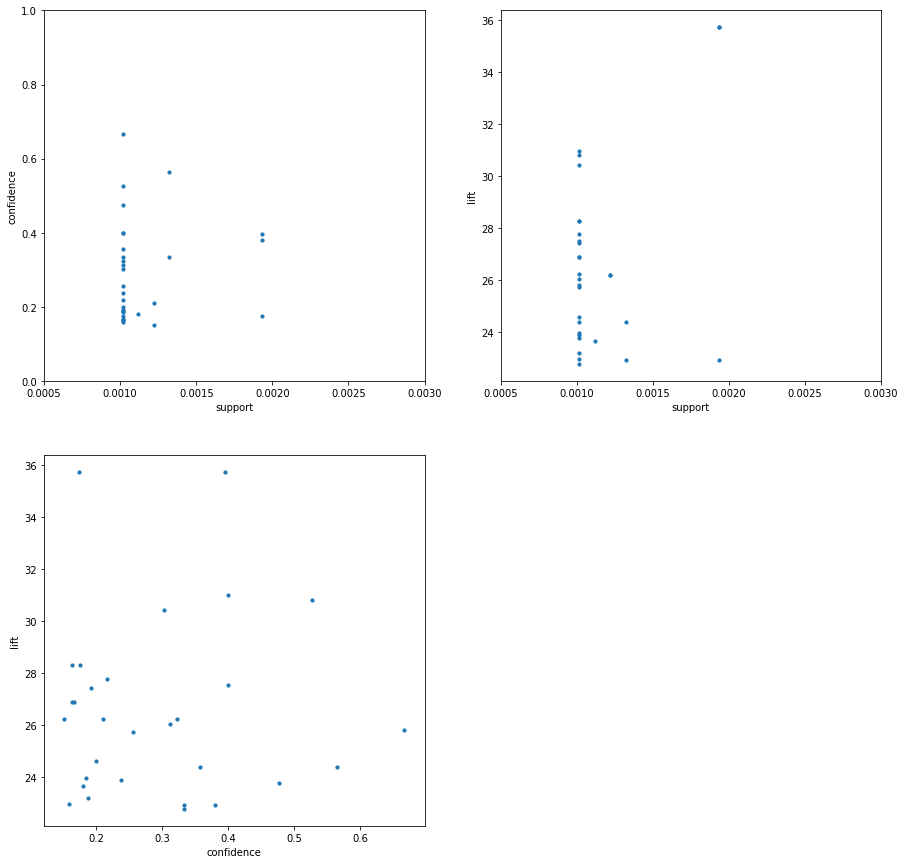

In [14]:
sub_rules=rules[(rules['lift']>=1)&(rules['confidence']>=0.15)].sort_values(by=['lift','confidence','support'],ascending=False).head(30)

support=sub_rules['support']
confidence=sub_rules['confidence']
lift=sub_rules['lift']

fig, ax=plt.subplots(figsize=(15,15))

plt.subplot(2,2,1)
plt.scatter(support,confidence,s=10)
plt.xlabel('support')
plt.ylabel('confidence')
plt.xlim(0.0005,0.003)
plt.ylim(0,1)

plt.subplot(2,2,2)
plt.scatter(support,lift,s=10)
plt.xlabel('support')
plt.ylabel('lift') 
plt.xlim(0.0005,0.003)

plt.subplot(2,2,3)
plt.scatter(confidence,lift,s=10)
plt.xlabel('confidence')
plt.ylabel('lift') 

plt.show()

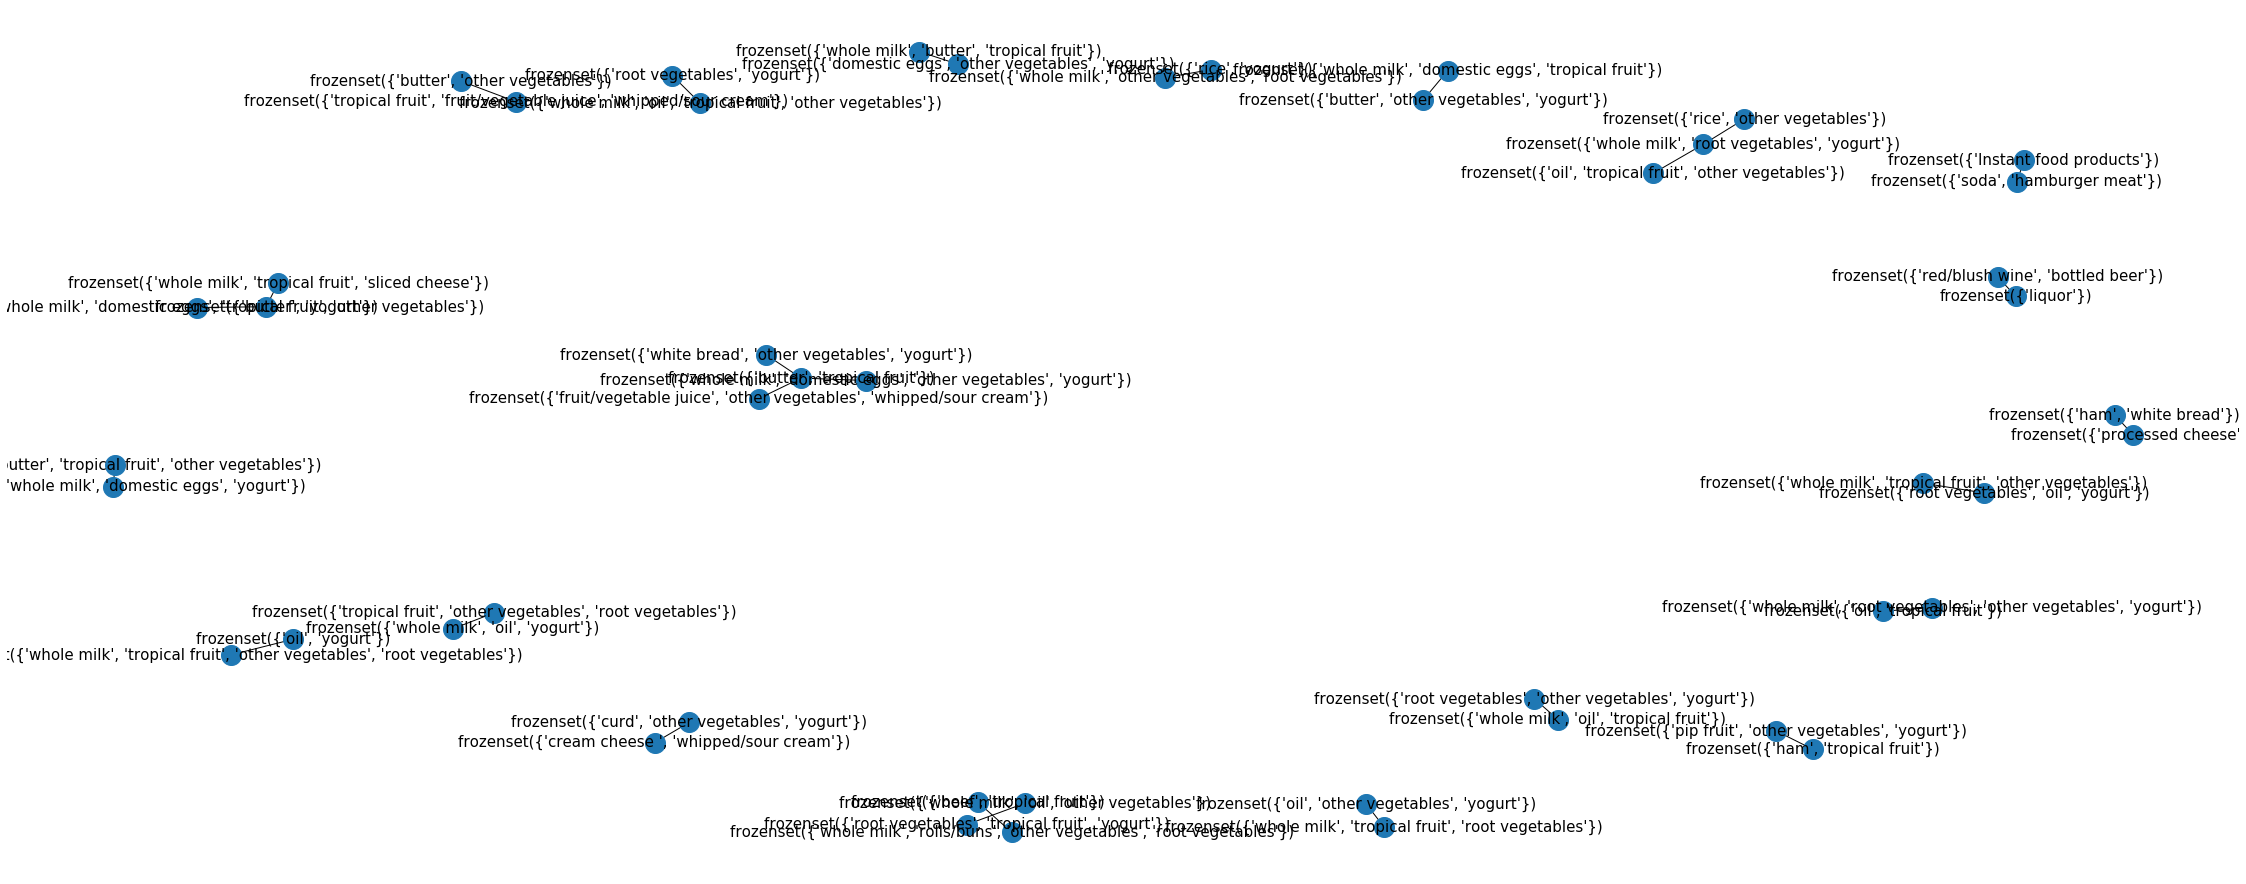

In [15]:
import networkx as nx
fig, ax=plt.subplots(figsize=(40,16))
GA=nx.from_pandas_edgelist(sub_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_size=15,node_size=400)
plt.show()